In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
#from sklearn import metrics
#from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve,ConfusionMatrixDisplay,confusion_matrix
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
pd.plotting.register_matplotlib_converters()
%matplotlib inline
plt.style.use('seaborn-whitegrid')
#pd.set_option('display.max_columns', 500)
warnings.filterwarnings("ignore")

C:\Users\Admin\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
df = pd.read_csv('final_data.csv')

In [3]:
df.head()

,Loan_Id,Disbursed_Amount,Asset_Cost,ltv,Branch_Id,Employment_Type,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,...,cns_score,delq_acc_6months,no_of_inquiries,Loan_Default,State_Name,City_Name,Region_Name,Disbursalmonth,Age,credit_hist_len_months
0,1,36439,65850,56.19,64,Self employed,1,1,0,0,...,0,0,0,0,Maharashtra,Mumbai,West,9,32,0
1,2,48749,69303,72.15,67,Salaried,1,1,0,0,...,783,0,0,0,Tamil Nadu,Chennai,South,9,31,30
2,3,55348,66340,85.00,2,Self employed,1,1,0,0,...,0,0,0,1,Bihar,Patna,East,8,29,0
3,4,48849,64133,77.96,217,Self employed,1,1,0,0,...,0,0,0,0,Rajasthan,Jaipur,North,10,33,0
4,5,40394,59386,70.72,74,Self employed,1,1,0,0,...,14,1,1,0,Tamil Nadu,Chennai,South,9,48,37


In [4]:
df.set_index('Loan_Id',inplace=True)
df.head()

,Disbursed_Amount,Asset_Cost,ltv,Branch_Id,Employment_Type,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,...,cns_score,delq_acc_6months,no_of_inquiries,Loan_Default,State_Name,City_Name,Region_Name,Disbursalmonth,Age,credit_hist_len_months
Loan_Id,,,,,,,,,,,,,,,,,,,,,
1,36439,65850,56.19,64,Self employed,1,1,0,0,0,...,0,0,0,0,Maharashtra,Mumbai,West,9,32,0
2,48749,69303,72.15,67,Salaried,1,1,0,0,0,...,783,0,0,0,Tamil Nadu,Chennai,South,9,31,30
3,55348,66340,85.00,2,Self employed,1,1,0,0,0,...,0,0,0,1,Bihar,Patna,East,8,29,0
4,48849,64133,77.96,217,Self employed,1,1,0,0,0,...,0,0,0,0,Rajasthan,Jaipur,North,10,33,0
5,40394,59386,70.72,74,Self employed,1,1,0,0,0,...,14,1,1,0,Tamil Nadu,Chennai,South,9,48,37


In [5]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Dimensions of the Dataset

In [6]:
df.shape

(23315, 21)

# Concise Summary

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23315 entries, 1 to 23315
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Disbursed_Amount        23315 non-null  int64  
 1   Asset_Cost              23315 non-null  int64  
 2   ltv                     23315 non-null  float64
 3   Branch_Id               23315 non-null  int64  
 4   Employment_Type         23315 non-null  object 
 5   MobileNo_Avl_Flag       23315 non-null  int64  
 6   Aadhar_flag             23315 non-null  int64  
 7   PAN_flag                23315 non-null  int64  
 8   VoterID_flag            23315 non-null  int64  
 9   Driving_flag            23315 non-null  int64  
 10  Passport_flag           23315 non-null  int64  
 11  cns_score               23315 non-null  int64  
 12  delq_acc_6months        23315 non-null  int64  
 13  no_of_inquiries         23315 non-null  int64  
 14  Loan_Default            23315 non-null

# Check the Missing Data

In [8]:
df.isnull().sum()

Disbursed_Amount          0
Asset_Cost                0
ltv                       0
Branch_Id                 0
Employment_Type           0
MobileNo_Avl_Flag         0
Aadhar_flag               0
PAN_flag                  0
VoterID_flag              0
Driving_flag              0
Passport_flag             0
cns_score                 0
delq_acc_6months          0
no_of_inquiries           0
Loan_Default              0
State_Name                0
City_Name                 0
Region_Name               0
Disbursalmonth            0
Age                       0
credit_hist_len_months    0
dtype: int64

# Check for duplicated values

In [9]:
df.duplicated().sum()

0

# Statistical Summary of data

In [10]:
df.describe()

,Disbursed_Amount,Asset_Cost,ltv,Branch_Id,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,cns_score,delq_acc_6months,no_of_inquiries,Loan_Default,Disbursalmonth,Age,credit_hist_len_months
count,23315.000000,23315.000000,23315.000000,23315.000000,23315.0,23315.000000,23315.000000,23315.000000,23315.000000,23315.000000,23315.000000,23315.000000,23315.000000,23315.000000,23315.000000,23315.000000,23315.000000
mean,54297.647309,75842.182887,74.701607,72.079262,1.0,0.845078,0.075531,0.141068,0.023161,0.002059,291.234956,0.100622,0.205790,0.219858,9.125842,38.051383,13.200858
std,13061.877434,18988.525635,11.462722,69.095008,0.0,0.361838,0.264252,0.348099,0.150418,0.045328,338.490214,0.388782,0.699901,0.414159,0.833346,9.788118,21.235527
min,13369.000000,37230.000000,17.130000,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,22.000000,0.000000
25%,46949.000000,65629.000000,68.830000,13.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,30.000000,0.000000
50%,53759.000000,70929.000000,76.710000,61.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,36.000000,0.000000
75%,60379.000000,79354.500000,83.630000,121.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,679.000000,0.000000,0.000000,0.000000,10.000000,45.000000,20.000000
max,592460.000000,715186.000000,94.980000,261.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,890.000000,7.000000,23.000000,1.000000,10.000000,68.000000,117.000000


In [11]:
df.describe(include='object').T

,count,unique,top,freq
Employment_Type,23315,3,Self employed,12724
State_Name,23315,18,Karnataka,2492
City_Name,23315,29,Vadodara,873
Region_Name,23315,4,South,8015


# Columns of the dataset

In [12]:
df.columns

Index(['Disbursed_Amount', 'Asset_Cost', 'ltv', 'Branch_Id', 'Employment_Type',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'cns_score', 'delq_acc_6months',
       'no_of_inquiries', 'Loan_Default', 'State_Name', 'City_Name',
       'Region_Name', 'Disbursalmonth', 'Age', 'credit_hist_len_months'],
      dtype='object')

# Check the target variable

In [13]:
print(round((df.Loan_Default.value_counts(normalize=True))*100,2))

0    78.01
1    21.99
Name: Loan_Default, dtype: float64


## As seen the Target variable is heavily biased towards 0

# EDA

In [14]:
for i in df.select_dtypes('object').columns:
    print(i.upper())
    print(pd.crosstab(df[i],df['Loan_Default']))
    print(('#').center(60,'-'))

EMPLOYMENT_TYPE
Loan_Default        0     1
Employment_Type            
Salaried         7806  2015
Self employed    9791  2933
Unemployed        592   178
-----------------------------#------------------------------
STATE_NAME
Loan_Default       0    1
State_Name               
Andhra Pradesh   574  178
Bihar            608  194
Delhi            608  169
Gujarat         1935  523
Jharkhand       1217  377
Karnataka       1944  548
Kerala          1251  363
Madhya Pradesh   617  183
Maharashtra     1947  535
Odisha           671  171
Punjab           639  191
Rajasthan        632  158
Sikkim           587  165
Tamil Nadu      1865  513
Telangana        613  166
Uttar Pradesh   1238  370
Uttarakhand      634  163
West Bengal      609  159
-----------------------------#------------------------------
CITY_NAME
Loan_Default    0    1
City_Name             
Ahmedabad     655  150
Aurangabad    650  170
Bangalore     653  187
Bhubaneshwar  671  171
Chennai       632  162
Coimbatore    623  1

In [15]:
outliers = df[['Disbursed_Amount','Asset_Cost','ltv']]
for i in outliers.columns:
    Q1,Q3 = np.quantile(outliers[i],[0.25,0.75])
    IQR = Q3-Q1
    lower_bound = Q1 - (1.5*IQR)
    if lower_bound < 0:
        lower_bound=0
    upper_bound = Q3 + (1.5*IQR)
    print(i)
    print('Lower Bound =',np.round(lower_bound,2),' Upper Bound =',np.round(upper_bound,2))
    print('min value =',outliers[i].min(), ' max value =', outliers[i].max())
    if outliers[i].min() < lower_bound:
        print('negative Outliers',len(outliers[(outliers[i]<lower_bound)]))
    if outliers[i].max() > upper_bound:
        print('positive Outliers', len(outliers[(outliers[i]>upper_bound)]))
    print('='*50)    

Disbursed_Amount
Lower Bound = 26804.0  Upper Bound = 80524.0
min value = 13369  max value = 592460
negative Outliers 259
positive Outliers 684
Asset_Cost
Lower Bound = 45040.75  Upper Bound = 99942.75
min value = 37230  max value = 715186
negative Outliers 145
positive Outliers 2204
ltv
Lower Bound = 46.63  Upper Bound = 105.83
min value = 17.13  max value = 94.98
negative Outliers 618


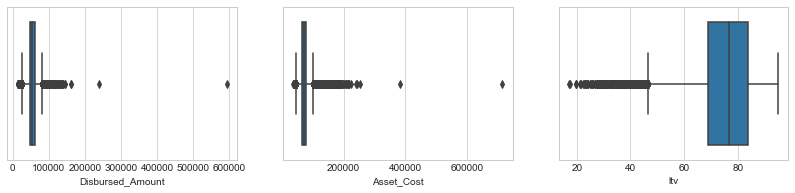

In [16]:
plt.figure(figsize=(14,40),facecolor='white')
c = df[['Disbursed_Amount','Asset_Cost','ltv']]
v=1
for i in c:
    ax=plt.subplot(12,3,v)
    sns.boxplot(c[i])
    v+=1
plt.show()

# As seen from the above outlier detection that there are a fair bit of outliers in the above 3 stated columns but here treating the outliers will mean loosing on valuable customer information as loan amount varies from individual to individual so I will not be treating any outlier values.

In [17]:
#df['delq_acc_6months'].unique()

In [18]:
df['Employment_Type'].value_counts()

Self employed    12724
Salaried          9821
Unemployed         770
Name: Employment_Type, dtype: int64

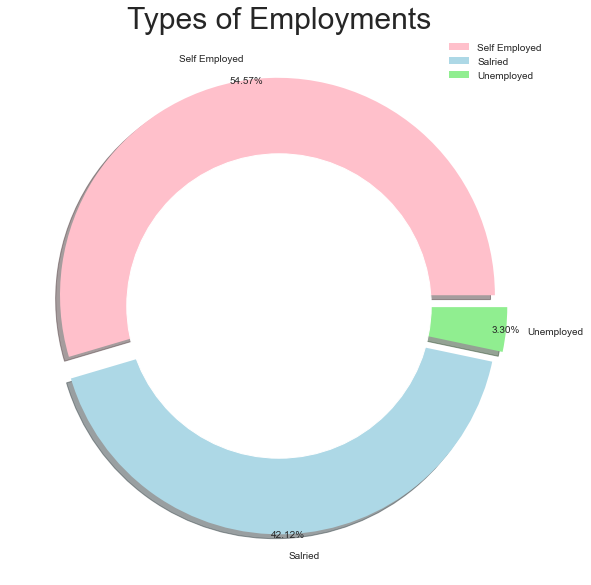

In [19]:
size = [12724, 9821, 770]
colors = ['pink', 'lightblue', 'lightgreen']
labels = "Self Employed", "Salried", "Unemployed" 
explode = [0.05, 0.05, 0.05]

circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, pctdistance = 1, autopct = '%.2f%%')
plt.title('Types of Employments', fontsize = 30)
plt.axis('off')
p = plt.gcf()
p.gca().add_artist(circle)
plt.legend()
plt.show()

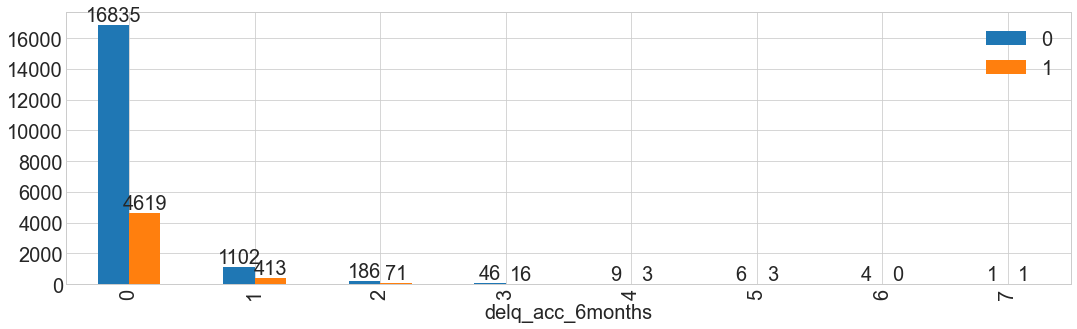

In [20]:
plt.rcParams['figure.figsize'] = (18, 5)
ax = pd.crosstab(df['delq_acc_6months'],df['Loan_Default'],normalize=False).plot(kind='bar');
#ax = pd.crosstab(round(df['delq_acc_6months'],df['Loan_Default'],normalize=True),2).plot(kind='bar');
ax.bar_label(ax.containers[0],fontsize=20);
ax.bar_label(ax.containers[1],fontsize=20);
plt.xticks(fontsize=20);
plt.yticks(fontsize=20);
plt.legend(fontsize=20);
ax.set_xlabel('delq_acc_6months',fontsize=20);

# Inference:- Maximum people who have availed the loans do not have any loan defaults accounts in the last 6 months but also have the highest loan default due to more people with no previous defaults.So it's advisable to give loans after having a look at the history of loan defaults.

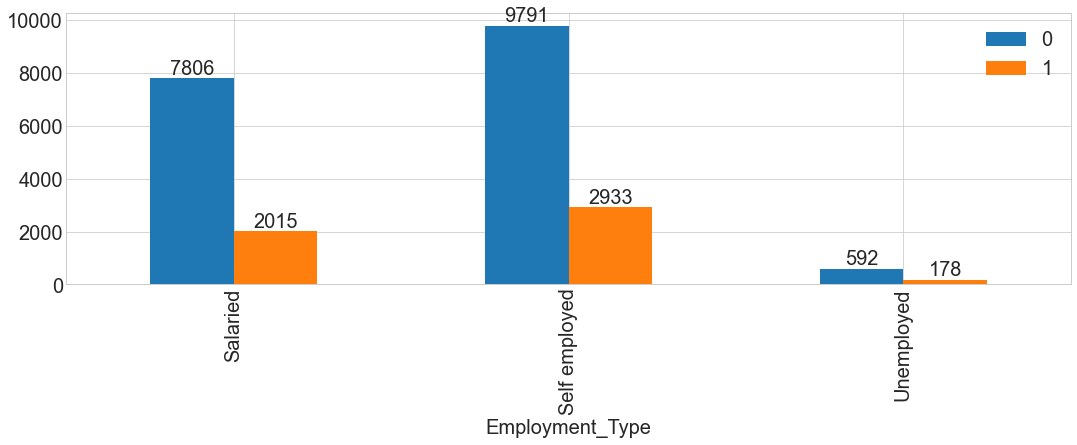

In [21]:
ax1 = pd.crosstab(df['Employment_Type'],df['Loan_Default']).plot(kind='bar')
ax1.bar_label(ax1.containers[0],fontsize=20);
ax1.bar_label(ax1.containers[1],fontsize=20);
plt.xticks(fontsize=20);
plt.yticks(fontsize=20);
plt.legend(fontsize=20);
ax1.set_xlabel('Employment_Type',fontsize=20);

# Inference:- The self Employed type has maximum number of people defaulting on loans followed by Salaried and then Unemployed.

# Self Employed individuals may default more due to the fact that generally business' especially small scale one's may see varied levels of profits and revenue generation meaning there is no steady cash flow resulting in defaults where as comparitvely for salaried class it is lower as they have a fixed income every month/year.

# It is advised to give loans to Self Employed individuals seeing their Assets,balance sheets and their Loan amount request only.

In [22]:
df.head(2)

,Disbursed_Amount,Asset_Cost,ltv,Branch_Id,Employment_Type,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,cns_score,delq_acc_6months,no_of_inquiries,Loan_Default,State_Name,City_Name,Region_Name,Disbursalmonth,Age,credit_hist_len_months
Loan_Id,,,,,,,,,,,,,,,,,,,,,
1,36439,65850,56.19,64,Self employed,1,1,0,0,0,0,0,0,0,0,Maharashtra,Mumbai,West,9,32,0
2,48749,69303,72.15,67,Salaried,1,1,0,0,0,0,783,0,0,0,Tamil Nadu,Chennai,South,9,31,30


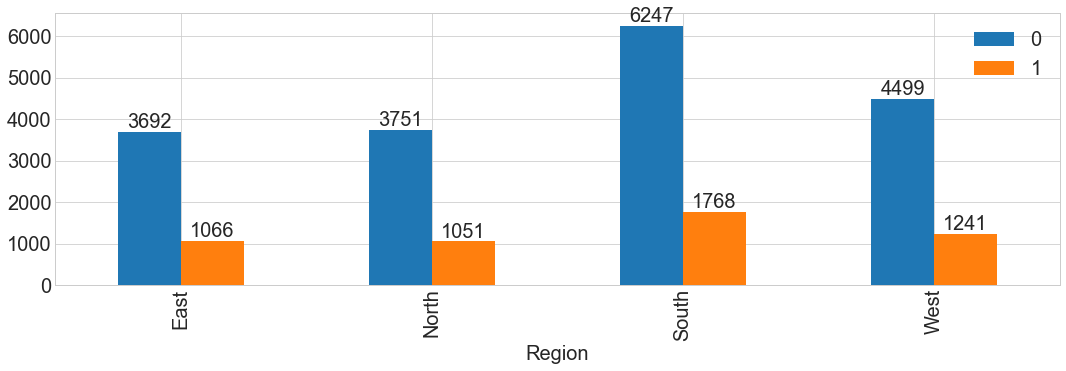

In [23]:
ax2 = pd.crosstab(df['Region_Name'],df['Loan_Default']).plot(kind='bar')
ax2.bar_label(ax2.containers[0],fontsize=20);
ax2.bar_label(ax2.containers[1],fontsize=20);
plt.xticks(fontsize=20);
plt.yticks(fontsize=20);
plt.legend(fontsize=20);
ax2.set_xlabel('Region',fontsize=20);

# South region has availed the maximum loans.

In [24]:
df1 = df.copy()
df2 = df.copy()

In [25]:
bins = pd.IntervalIndex.from_tuples([(20, 30), (30, 40), (40, 50),(50,60),(60,70)])
df1['age_group'] = pd.cut(df1['Age'],bins=bins)

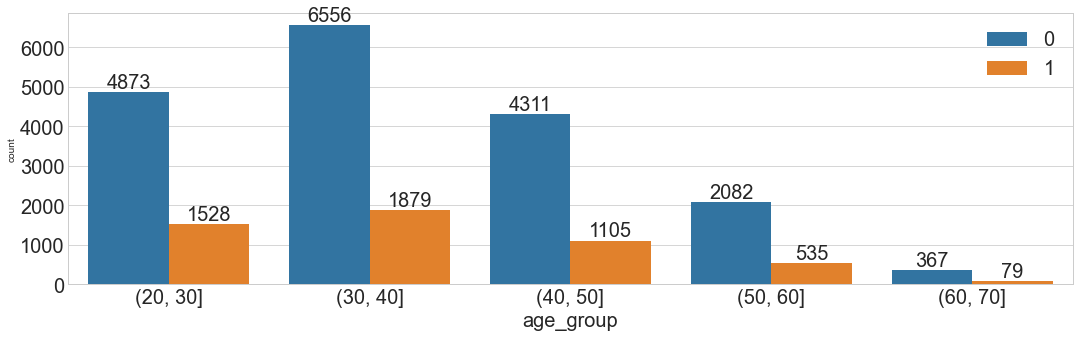

In [26]:
ax3 = sns.countplot(x='age_group',data=df1,hue='Loan_Default');
ax3.bar_label(ax3.containers[0],fontsize=20);
ax3.bar_label(ax3.containers[1],fontsize=20);
plt.xticks(fontsize=20);
plt.yticks(fontsize=20);
plt.legend(fontsize=20);
ax3.set_xlabel('age_group',fontsize=20);

# Most the people who avail loans are from the age of 30-40 then from 20-30

In [27]:
df1['credit_hist_len_months'].unique()

array([  0,  30,  37,  14,  13,  24,   1,  16,   6,  53,  20,   2,   8,
        18,  36,  69,  64,  15,  54,  50,   9,  73,  25,  21,  78,  77,
         5,  39,  81,  40,  42,  19,   7,   3,  31,  56,  68,  12,  32,
         4,  66,  44,  75,  27,  61,  17,  38,  60,  26,  49,  41,  52,
        85,  74,  48,  62, 111,  63,  33,  43,  29,  65, 115,  80,  93,
        51,  28,  87,  45, 109, 114,  98, 112,  96,  57, 102,  55,  88,
        79,  67,  72, 113,  92,  90,  97, 116,  84,  91, 117,  86, 105,
        76, 101, 108,  89, 100, 103, 110, 104,  99], dtype=int64)

In [28]:
bins1 = pd.IntervalIndex.from_tuples([(-np.inf,24), (24,48), (48,72),(72,96),(96,120)])
df2['credit_hist_bins'] = pd.cut(df2['credit_hist_len_months'],bins=bins1)

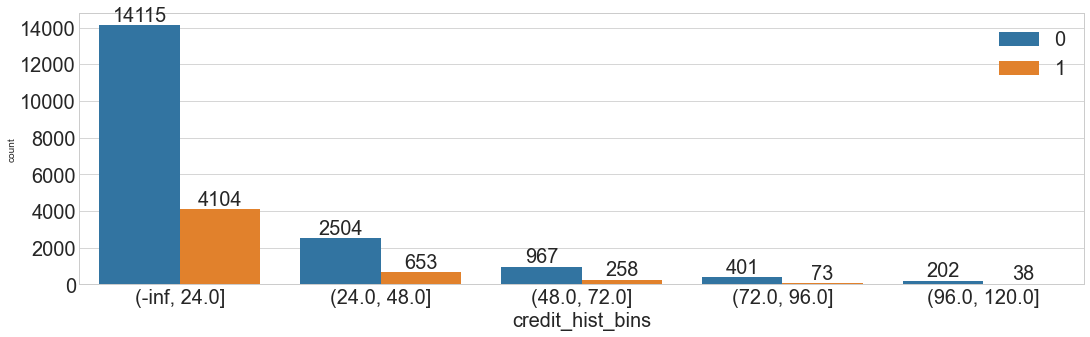

In [29]:
ax4 = sns.countplot(x='credit_hist_bins',data=df2,hue='Loan_Default');
ax4.bar_label(ax4.containers[0],fontsize=20);
ax4.bar_label(ax4.containers[1],fontsize=20);
plt.xticks(fontsize=20);
plt.yticks(fontsize=20);
plt.legend(fontsize=20);
ax4.set_xlabel('credit_hist_bins',fontsize=20);

# Most of the people who have availed loans have a credit history length of 0-24 months.

In [30]:
bins2 = pd.IntervalIndex.from_tuples([(-np.inf,200), (200,400), (400,600),(600,800),(800,1000)])
df2['cns_bins'] = pd.cut(df2['cns_score'],bins=bins2)

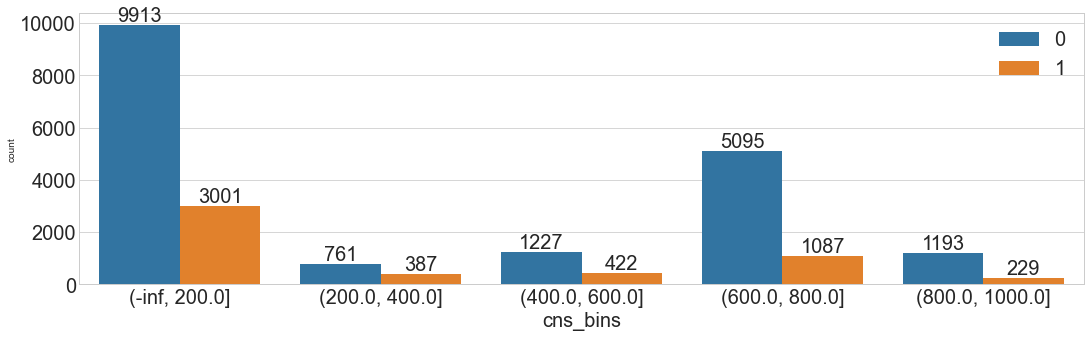

In [31]:
ax5 = sns.countplot(x='cns_bins',data=df2,hue='Loan_Default');
ax5.bar_label(ax5.containers[0],fontsize=20);
ax5.bar_label(ax5.containers[1],fontsize=20);
plt.xticks(fontsize=20);
plt.yticks(fontsize=20);
plt.legend(fontsize=20);
ax5.set_xlabel('cns_bins',fontsize=20);

# Most of the people who have availed loans have a cns Score of the range 600-800 also we see that the people who have a cns score b/w 0-200 and 200-400 have more defaults than the people who have a cns score of 800-1000 which indicates that it is important to have a look at the CNS score for while availing loans. 0 CNS score can be attributed to student loans as at the the time of availing loan they don't have an income. In that case the income certificate of parents might be seen. **Higher the CNS score less are the chances of loan default**.

# Hypothesis Testing

# 1) Is the Loan default population of the dataset above 30%?

H0:  P=0.3

H1: P!=0.3

In [32]:
from statsmodels.stats.proportion import proportions_ztest

In [33]:
df['Loan_Default'].value_counts()

0    18189
1     5126
Name: Loan_Default, dtype: int64

In [34]:
alpha=0.05
P=0.30
x=5126
n=23315
proportions_ztest(x,n,P,alternative='smaller')

(-29.547252239653837, 3.561596683559015e-192)

since p value < 0.05 we fail to reject the alternate hypothesis. I conclude that the Loan default proportion is not equal to 0.3 or 30%

# 2) Is the loan default proportion different amomg salaried and self employed individuals?

H0: P_salaried= P_slef; 

H1: P_salaried != P_self; 

In [35]:
pd.crosstab(df.Employment_Type,df.Loan_Default,margins=True)

Loan_Default,0,1,All
Employment_Type,,,
Salaried,7806,2015,9821
Self employed,9791,2933,12724
Unemployed,592,178,770
All,18189,5126,23315


In [36]:
xsal = 2015
xself = 2993 
nsal = 9821
nself = 12724

In [37]:
proportions_ztest([xsal,xself],[nsal,nself])

(-5.382462533031102, 7.347367351120171e-08)

Since p value < alpha(0.05) --> we reject H0

Conclusion = loan default proportion is different for salaried and self employed

# Q3) Is there an association b/w Employment type and Regions?

H0:- There is no association b/w Employment type and Regions

H1:- There is association b/w Employment type and Regions

In [38]:
re = pd.crosstab(df.Employment_Type,df.Region_Name)
re

Region_Name,East,North,South,West
Employment_Type,,,,
Salaried,1972,1998,3433,2418
Self employed,2631,2657,4298,3138
Unemployed,155,147,284,184


In [39]:
from scipy.stats import chi2_contingency

In [40]:
stat,pval,dof,exp=chi2_contingency(re)

In [41]:
print("P value is:",round(pval,3))

P value is: 0.368


Since p value > 0.05 We accept the Null Hypothesis.

There is no association b/w Employment type and Regions

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


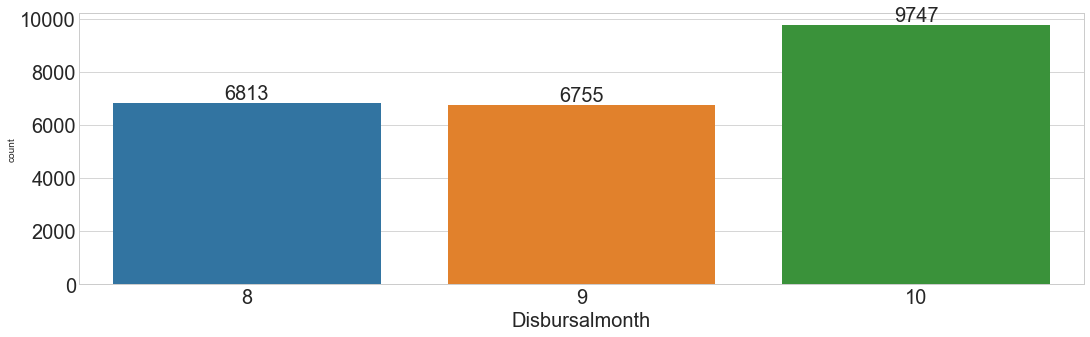

In [42]:
ax6 = sns.countplot(x='Disbursalmonth',data=df);
ax6.bar_label(ax6.containers[0],fontsize=20);
plt.xticks(fontsize=20);
plt.yticks(fontsize=20);
plt.xticks(fontsize=20);
plt.yticks(fontsize=20);
plt.legend(fontsize=20);
ax6.set_xlabel('Disbursalmonth',fontsize=20);

# The disbursal dates belong to the year 2018 and to the months August,September and October. Most loans were given in the month of October.

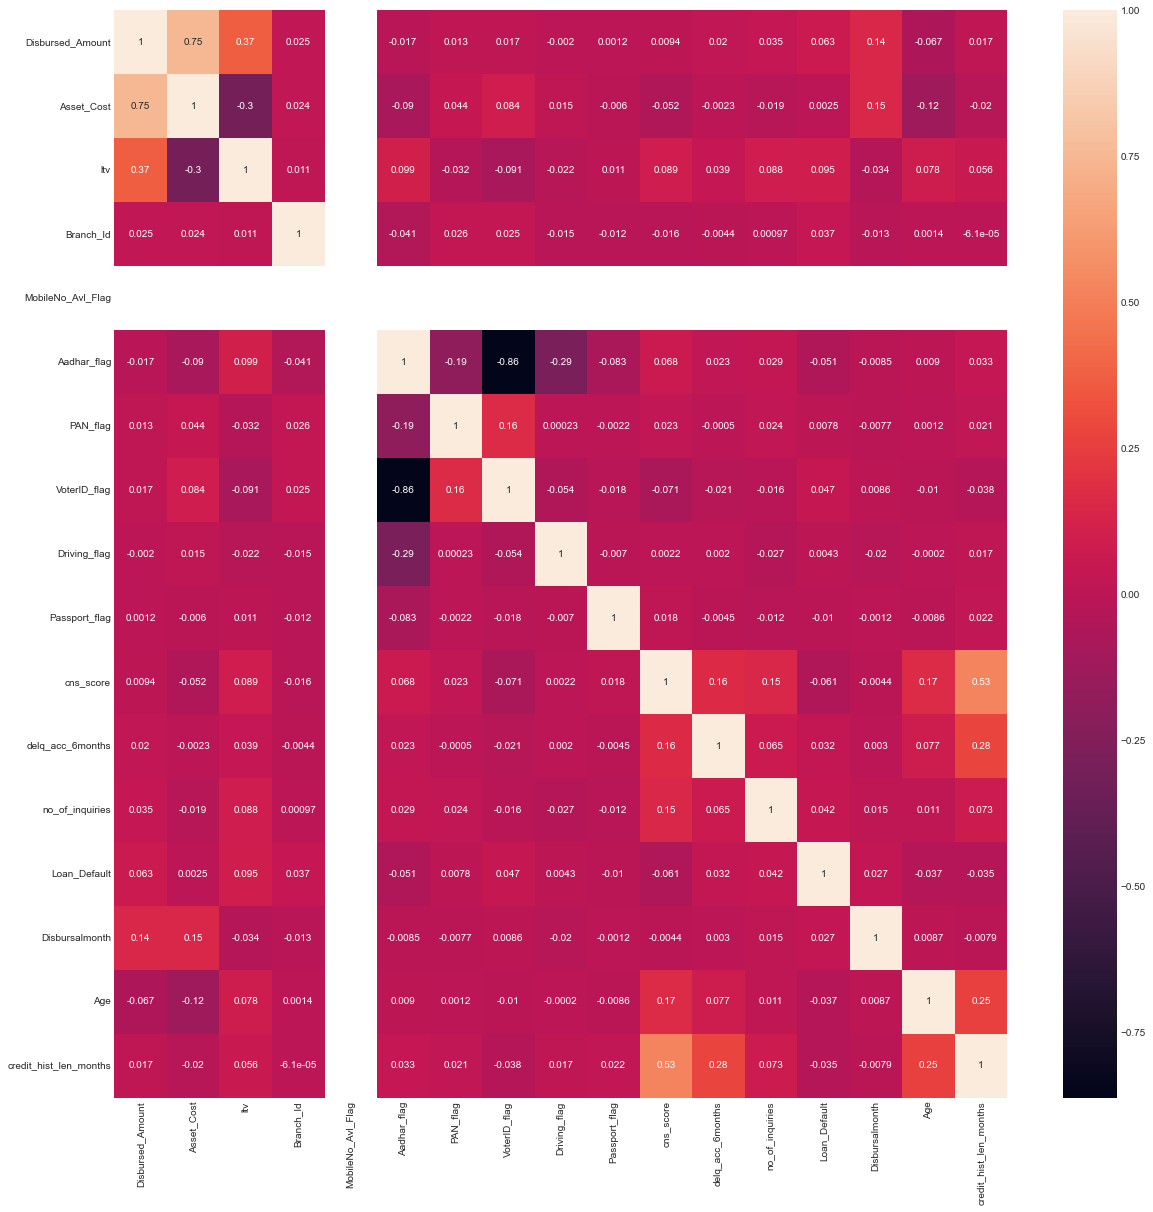

In [43]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True);

# The heat map suggests that at large there is no large correlation b/w the variables on. We can see a co-relation b/w asset cost and disbursed amount also there is a slight co-relation b/w credit hist len and age of the applicant.

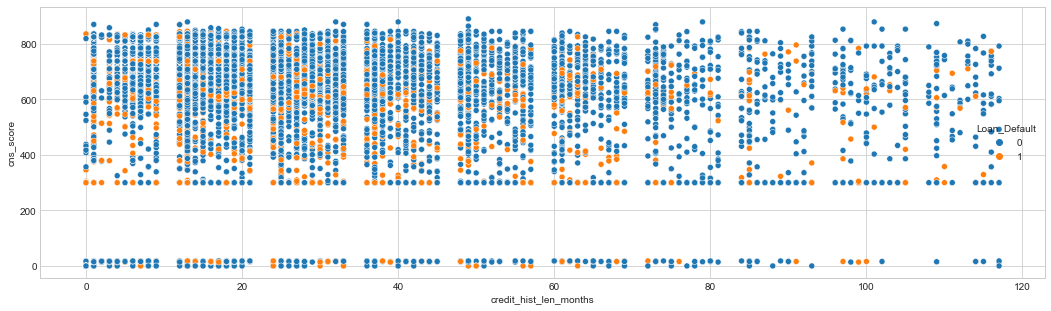

In [44]:
sns.scatterplot(x='credit_hist_len_months',y='cns_score',data=df,hue='Loan_Default');

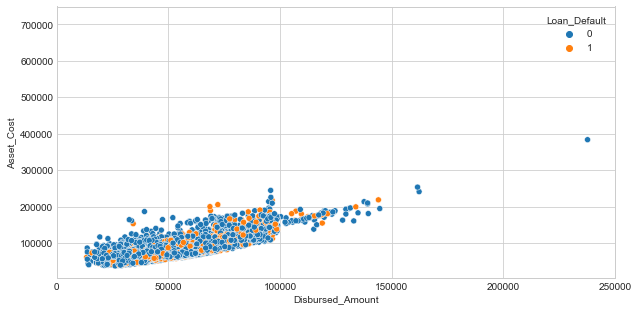

In [45]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Disbursed_Amount',y='Asset_Cost',data=df,hue='Loan_Default');
plt.xlim(0,250000);

# We can see a very slight linear relation b/w disbursed amount and asset cost as loan amount availed increases when the asset cost is more.

In [46]:
#sns.pairplot(df,hue='Loan_Default');

In [47]:
scatter = df[['Disbursed_Amount','Asset_Cost','ltv','cns_score','Age','credit_hist_len_months','Loan_Default']]

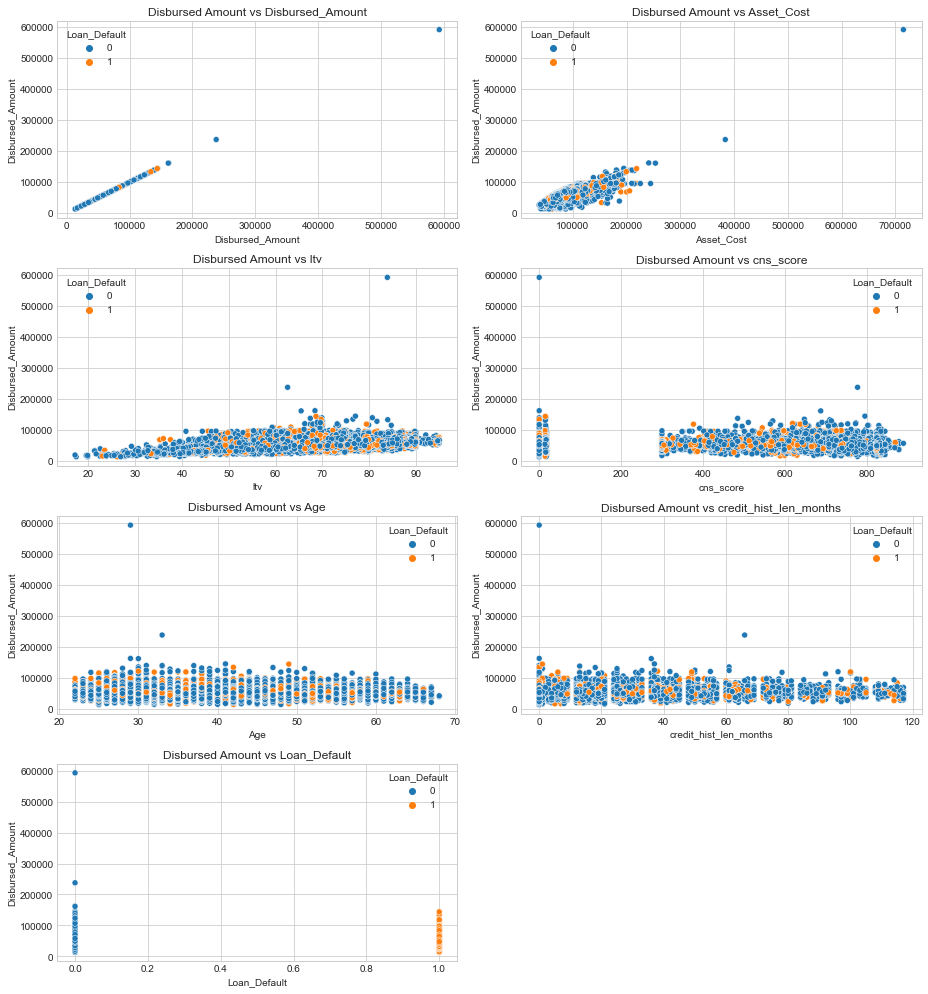

In [48]:
numeric_columns = scatter.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(13,17))
for i, variable in enumerate(numeric_columns):
                     plt.subplot(5,2,i+1)
                     sns.scatterplot(x=scatter[variable],y=scatter['Disbursed_Amount'],hue=scatter['Loan_Default']).set(title='Disbursed Amount vs '+ variable)
                     #plt.xticks(rotation=90)
                     plt.tight_layout()

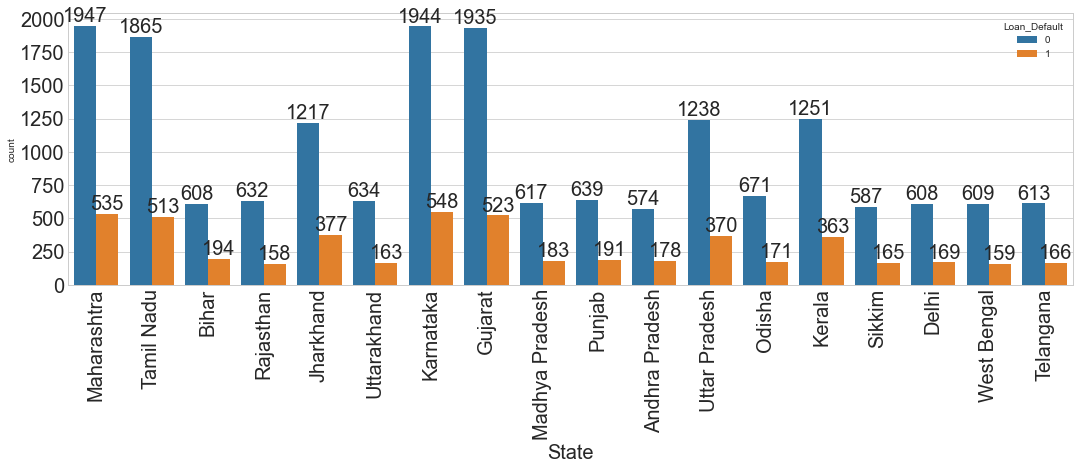

In [49]:
ax7 = sns.countplot(x='State_Name',data=df,hue='Loan_Default');
ax7.bar_label(ax7.containers[0],fontsize=20);
ax7.bar_label(ax7.containers[1],fontsize=20);
plt.xticks(rotation=90);
plt.xticks(fontsize=20);
plt.yticks(fontsize=20);
ax7.set_xlabel('State',fontsize=20);

# Maharashtra,Karnataka and Gujarat are 3 states with most loans availed out of that Karnataka has the highest loan default numbers.

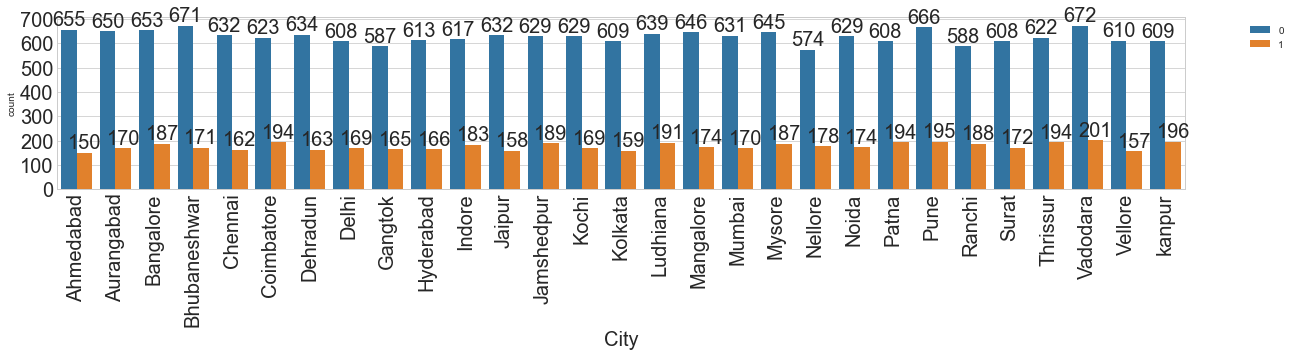

In [50]:
ax8 = sns.countplot(x='City_Name',data=df.sort_values(by='City_Name'),hue='Loan_Default');
ax8.bar_label(ax8.containers[0],fontsize=20);
ax8.bar_label(ax8.containers[1],fontsize=20);
plt.xticks(rotation=90);
plt.xticks(fontsize=20);
plt.yticks(fontsize=20);
plt.legend(fontsize=20);
ax8.set_xlabel('City',fontsize=20);
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.show()

# Vadodara is the city which has maximum people availing loans.

In [51]:
df.head(2)

,Disbursed_Amount,Asset_Cost,ltv,Branch_Id,Employment_Type,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,cns_score,delq_acc_6months,no_of_inquiries,Loan_Default,State_Name,City_Name,Region_Name,Disbursalmonth,Age,credit_hist_len_months
Loan_Id,,,,,,,,,,,,,,,,,,,,,
1,36439,65850,56.19,64,Self employed,1,1,0,0,0,0,0,0,0,0,Maharashtra,Mumbai,West,9,32,0
2,48749,69303,72.15,67,Salaried,1,1,0,0,0,0,783,0,0,0,Tamil Nadu,Chennai,South,9,31,30


# Conclusions & Suggestions from EDA:- 

1) The CNS score and employment type are the 2 main criteria's for giving loans. Higher the CNS score lesser the probability of defaults/

2) There is not much co-relation b/w the variables of the dataset. 

3) There are only 4 region wise classification in the data set so for the sake of simplicity of analysis and for states like Madhya Pradesh , Chattisgarh we can add a **central** region for analysis

4) Most of the Accounts have no default accounts in the last 6 months 

5) Self Employed individuals have taken more loans.

# The columns affecting the loan default variable is CNS score and Employment type.

# Model Building

In [52]:
import scipy.stats as st
df10 = df.copy()
df11 = df.copy()
df12 = df.copy()
df13 = df.copy()
df14 = df.copy()
df15 = df.copy()
df16 = df.copy()

In [53]:
df.head(2)

,Disbursed_Amount,Asset_Cost,ltv,Branch_Id,Employment_Type,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,cns_score,delq_acc_6months,no_of_inquiries,Loan_Default,State_Name,City_Name,Region_Name,Disbursalmonth,Age,credit_hist_len_months
Loan_Id,,,,,,,,,,,,,,,,,,,,,
1,36439,65850,56.19,64,Self employed,1,1,0,0,0,0,0,0,0,0,Maharashtra,Mumbai,West,9,32,0
2,48749,69303,72.15,67,Salaried,1,1,0,0,0,0,783,0,0,0,Tamil Nadu,Chennai,South,9,31,30


In [54]:
# customer has passport or not
df['Passport_flag'].value_counts()

0    23267
1       48
Name: Passport_flag, dtype: int64

In [55]:
# customer has driving license or not

df['Driving_flag'].value_counts()

0    22775
1      540
Name: Driving_flag, dtype: int64

In [56]:
# customer has voter-id card or not

df['VoterID_flag'].value_counts()

0    20026
1     3289
Name: VoterID_flag, dtype: int64

In [57]:
# customer has pan card or not

df['PAN_flag'].value_counts()

0    21554
1     1761
Name: PAN_flag, dtype: int64

In [58]:
# customer has aadhar card or not

df['Aadhar_flag'].value_counts()

1    19703
0     3612
Name: Aadhar_flag, dtype: int64

In [59]:
# customer has shared the mobile no. or not

df['MobileNo_Avl_Flag'].value_counts()

1    23315
Name: MobileNo_Avl_Flag, dtype: int64

In [60]:
df.head(1)

,Disbursed_Amount,Asset_Cost,ltv,Branch_Id,Employment_Type,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,cns_score,delq_acc_6months,no_of_inquiries,Loan_Default,State_Name,City_Name,Region_Name,Disbursalmonth,Age,credit_hist_len_months
Loan_Id,,,,,,,,,,,,,,,,,,,,,
1,36439,65850,56.19,64,Self employed,1,1,0,0,0,0,0,0,0,0,Maharashtra,Mumbai,West,9,32,0


In [61]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler

In [62]:
stdsc = StandardScaler()

In [63]:
#df10['Disbursed_Amount'] = np.log(df10['Disbursed_Amount'])
#df10['Asset_Cost'] = np.log(df10['Asset_Cost'])
#df10['ltv'] = np.log(df10['ltv'])
#df10['cns_score'] = np.log1p(df10['cns_score'])

In [64]:
#from sklearn.preprocessing import LabelEncoder 

In [65]:
#le = LabelEncoder()

In [66]:
#df10['Branch_Id'] = le.fit_transform(df10['Branch_Id'])
#df10['Employment_Type'] = le.fit_transform(df10['Employment_Type'])
#df10['State_Name'] = le.fit_transform(df10['State_Name'])
#df10['Region_Name'] = le.fit_transform(df10['Region_Name'])
#df10.drop('City_Name',axis=1,inplace=True)

# Decision Tree

In [67]:
df10 = df.copy()

In [68]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df10['Employment_Type'] = le.fit_transform(df10['Employment_Type'])
df10['State_Name'] = le.fit_transform(df10['State_Name'])
df10['Region_Name'] = le.fit_transform(df10['Region_Name'])
df10['Branch_Id'] = le.fit_transform(df10['Branch_Id'])

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
df10.drop('City_Name',axis=1,inplace=True)

In [71]:
x = df10.drop('Loan_Default',axis=1)
y = df10['Loan_Default']

In [72]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=10,sampling_strategy='minority')
x,y = sm.fit_resample(x,y)
df10 = pd.concat([pd.DataFrame(y), pd.DataFrame(x)], axis=1)

In [73]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)
print('x_train :',xtrain.shape)
print('x_test  :',xtest.shape)
print('y_train :',ytrain.shape)
print('y_test  :',ytest.shape)

x_train : (29102, 19)
x_test  : (7276, 19)
y_train : (29102,)
y_test  : (7276,)


In [74]:
xtrain = stdsc.fit_transform(xtrain)
xtest = stdsc.transform(xtest)

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,precision_score,ConfusionMatrixDisplay,classification_report

In [76]:
model = DecisionTreeClassifier(random_state=10)
model.fit(xtrain,ytrain)
pred1 = model.predict(xtest)

In [77]:
print(classification_report(ytest,pred1))

              precision    recall  f1-score   support

           0       0.75      0.70      0.72      3700
           1       0.71      0.76      0.73      3576

    accuracy                           0.73      7276
   macro avg       0.73      0.73      0.73      7276
weighted avg       0.73      0.73      0.73      7276



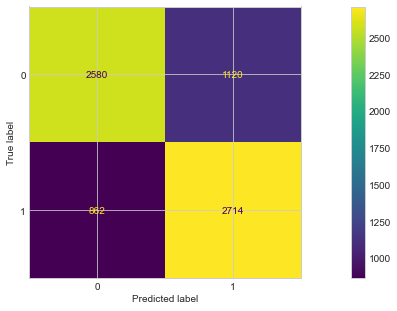

In [78]:
ConfusionMatrixDisplay.from_predictions(ytest,pred1);

In [79]:
from sklearn.metrics import precision_recall_curve,PrecisionRecallDisplay

In [80]:
precision, recall, _ = precision_recall_curve(ytest, pred1)

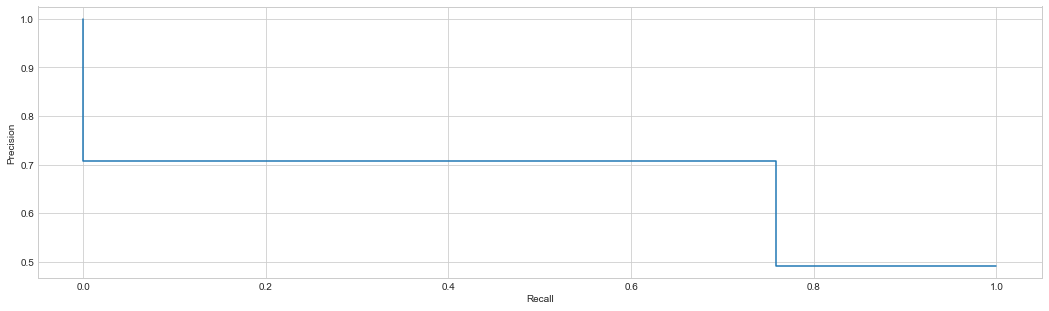

In [81]:
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot();

# The Precision and Recall values here are 0.75, 0.71 and 0.70, 0.76

In [82]:
from sklearn.ensemble import BaggingClassifier

ls=[]
for w in range(250,300,10):
    clf=BaggingClassifier(oob_score=True,n_estimators=w,random_state=400,
                          base_estimator=DecisionTreeClassifier())
    clf.fit(xtrain,ytrain)
    oob=clf.oob_score_
    print('For n_estimators = ', w)
    print('OOB score is ', oob)
    print('************************')
    ls.append((oob,w))

print(max(ls))

In [83]:
clf1 = BaggingClassifier(oob_score=True,n_estimators=290,base_estimator=DecisionTreeClassifier())

In [84]:
clf1.fit(xtrain,ytrain)
pred2 = clf1.predict(xtest)

In [85]:
print(classification_report(ytest,pred2))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83      3700
           1       0.85      0.76      0.80      3576

    accuracy                           0.82      7276
   macro avg       0.82      0.82      0.82      7276
weighted avg       0.82      0.82      0.82      7276



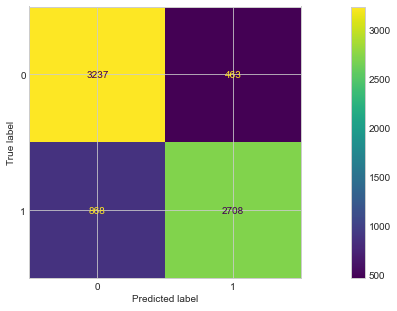

In [86]:
ConfusionMatrixDisplay.from_predictions(ytest,pred2);

In [87]:
print("Training Accuracy: ", clf1.score(xtrain, ytrain))
print('Testing Accuarcy: ', clf1.score(xtest, ytest))

Training Accuracy:  1.0
Testing Accuarcy:  0.8170698185816383


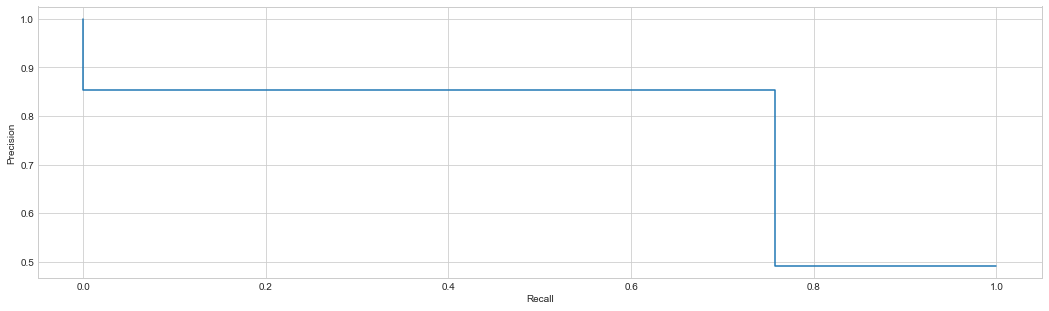

In [88]:
precision, recall, _ = precision_recall_curve(ytest, pred2)
disp1 = PrecisionRecallDisplay(precision=precision, recall=recall)
disp1.plot();

# There is Over-fitting in this model hence going for Random Forest

# Random Forest

In [89]:
from sklearn.ensemble import RandomForestClassifier

Training Accuracy:  1.0
Testing Accuarcy:  0.8119846069268829
              precision    recall  f1-score   support

           0       0.79      0.86      0.82      3700
           1       0.84      0.76      0.80      3576

    accuracy                           0.81      7276
   macro avg       0.82      0.81      0.81      7276
weighted avg       0.81      0.81      0.81      7276



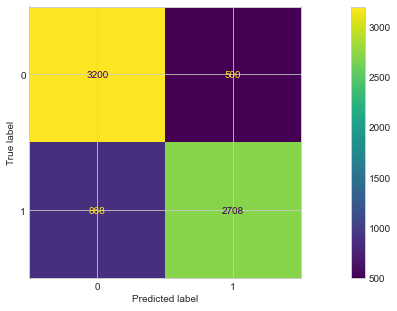

In [90]:
model_rf = RandomForestClassifier(n_estimators=500,random_state=10)
model_rf.fit(xtrain, ytrain)

pred3 = model_rf.predict(xtest)

print("Training Accuracy: ", model_rf.score(xtrain, ytrain))
print('Testing Accuarcy: ', model_rf.score(xtest, ytest))

# making a classification report
cr = classification_report(ytest,  pred3)
print(cr)

# making a confusion matrix
ConfusionMatrixDisplay.from_predictions(ytest,pred3);

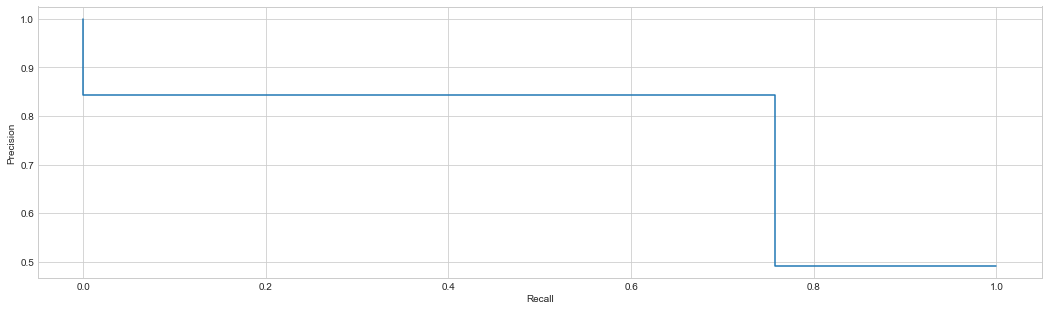

In [91]:
precision, recall, _ = precision_recall_curve(ytest, pred3)
disp2 = PrecisionRecallDisplay(precision=precision, recall=recall)
disp2.plot();

# Since both the Decision Tree and Random Forest Classifier are both over fitting I turn to boosting techniques to improve my model.

# AdaBoost Classifier

Training Accuracy:  0.7273383272627311
Testing Accuarcy:  0.7188015393073117
              precision    recall  f1-score   support

           0       0.72      0.73      0.73      3700
           1       0.72      0.71      0.71      3576

    accuracy                           0.72      7276
   macro avg       0.72      0.72      0.72      7276
weighted avg       0.72      0.72      0.72      7276



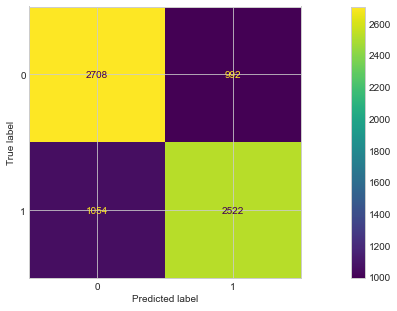

In [92]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model_ada = AdaBoostClassifier(random_state=101)
model_ada.fit(xtrain, ytrain)

pred4 = model_ada.predict(xtest)

print("Training Accuracy: ", model_ada.score(xtrain, ytrain))
print('Testing Accuarcy: ', model_ada.score(xtest, ytest))

# making a classification report
cr = classification_report(ytest,  pred4)
print(cr)

# making a confusion matrix
ConfusionMatrixDisplay.from_predictions(ytest,pred4);

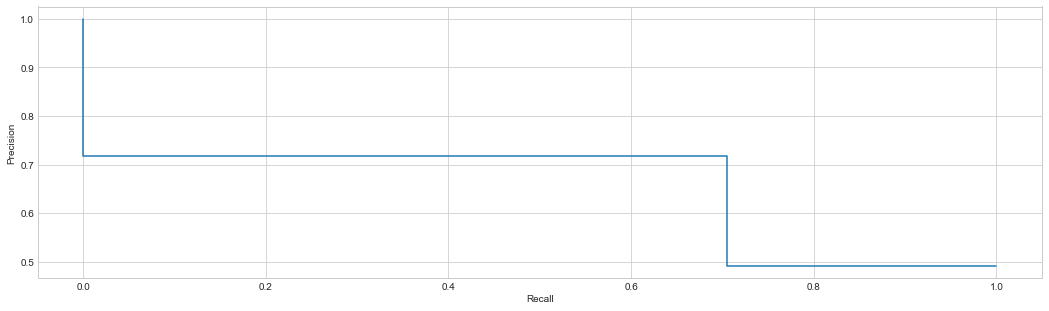

In [93]:
precision, recall, _ = precision_recall_curve(ytest, pred4)
disp3 = PrecisionRecallDisplay(precision=precision, recall=recall)
disp3.plot();

# GradientBoostingClassifier

In [94]:
from sklearn.ensemble import GradientBoostingClassifier

In [95]:
gbc = GradientBoostingClassifier(n_estimators=500,random_state=100)
gbc.fit(xtrain,ytrain)
pred5 = gbc.predict(xtest)

              precision    recall  f1-score   support

           0       0.76      0.88      0.82      3700
           1       0.85      0.71      0.77      3576

    accuracy                           0.80      7276
   macro avg       0.81      0.80      0.79      7276
weighted avg       0.80      0.80      0.79      7276



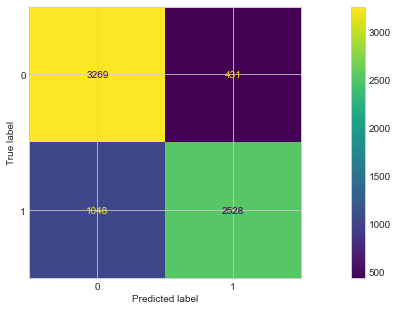

In [96]:
cr = classification_report(ytest,  pred5)
print(cr)

# making a confusion matrix
ConfusionMatrixDisplay.from_predictions(ytest,pred5);

In [97]:
print("Training Accuracy: ", gbc.score(xtrain, ytrain))
print('Testing Accuarcy: ', gbc.score(xtest, ytest))

Training Accuracy:  0.82025290358051
Testing Accuarcy:  0.7967289719626168


In [98]:
prob5  = gbc.predict_proba(xtest)[:,1] 
prob5

array([0.97575037, 0.93691422, 0.2112374 , ..., 0.15607199, 0.10272467,
       0.89179282])

Text(0, 0.5, 'True positive rate')

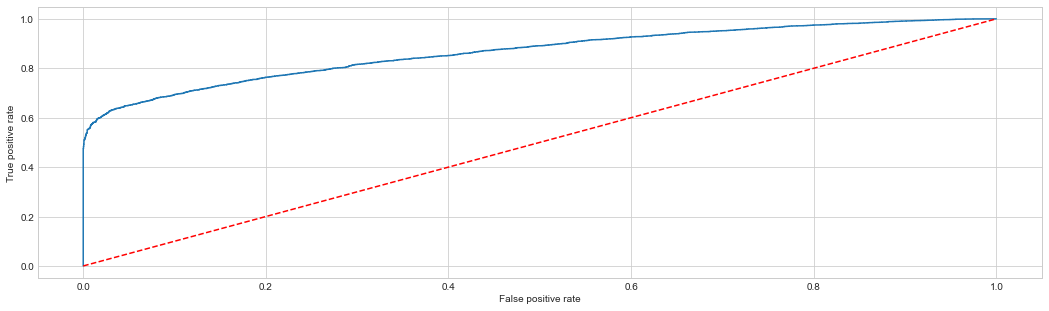

In [99]:
from sklearn.metrics import roc_curve,roc_auc_score

fpr,tpr,threshold = roc_curve(ytest,prob5)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],color='r',ls='--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

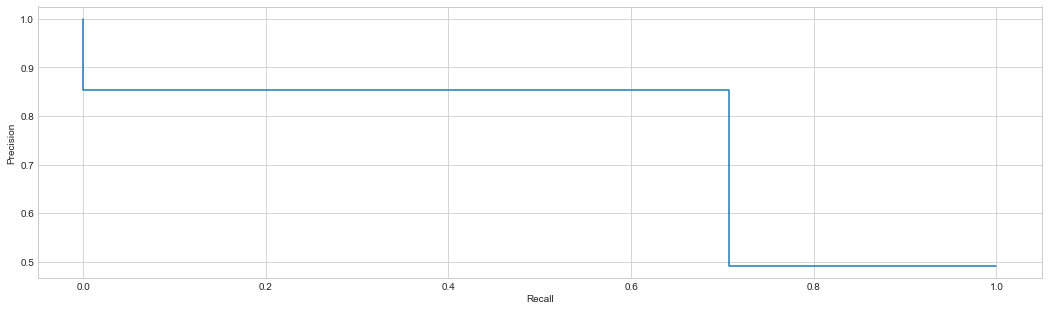

In [100]:
precision, recall, _ = precision_recall_curve(ytest, pred5)
disp4 = PrecisionRecallDisplay(precision=precision, recall=recall)
disp4.plot();

# Xg-Boost Classifier

Training Accuracy:  0.8433784619613772
Testing Accuarcy:  0.7978284771852666
              precision    recall  f1-score   support

           0       0.76      0.89      0.82      3700
           1       0.86      0.71      0.77      3576

    accuracy                           0.80      7276
   macro avg       0.81      0.80      0.80      7276
weighted avg       0.81      0.80      0.80      7276



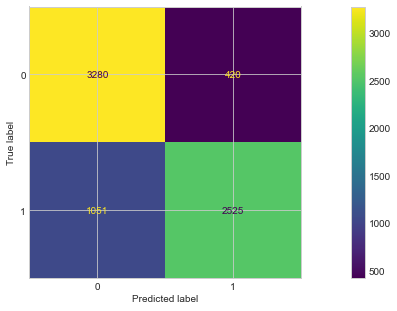

In [101]:
# Xg-Boost Classifier
from xgboost.sklearn import XGBClassifier
model_xgb = XGBClassifier(n_estimators=40,eval_metric='mlogloss')
model_xgb.fit(xtrain, ytrain)

pred6 = model_xgb.predict(xtest)

print("Training Accuracy: ", model_xgb.score(xtrain, ytrain))
print('Testing Accuarcy: ', model_xgb.score(xtest, ytest))

# making a classification report
cr = classification_report(ytest,  pred6)
print(cr)

# making a confusion matrix
ConfusionMatrixDisplay.from_predictions(ytest,pred6);

In [102]:
prob6  = model_xgb.predict_proba(xtest)[:,1] 
prob6

array([0.98768276, 0.9490546 , 0.23977116, ..., 0.1578738 , 0.10511989,
       0.986075  ], dtype=float32)

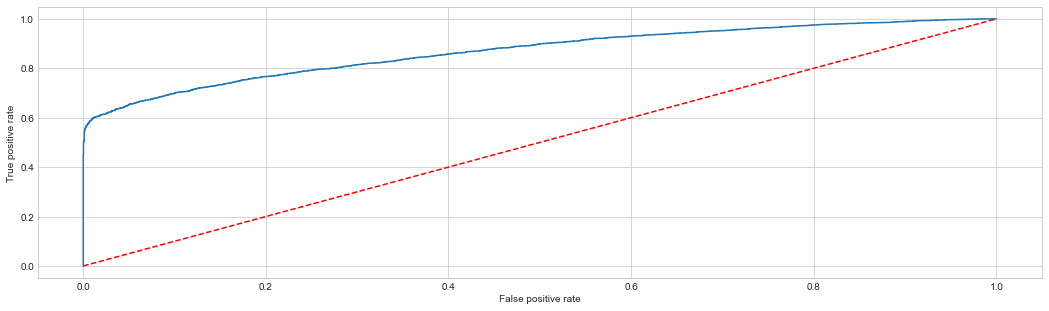

In [103]:
from sklearn.metrics import roc_curve,roc_auc_score

fpr,tpr,threshold = roc_curve(ytest,prob6);
plt.plot(fpr,tpr);
plt.plot([0,1],[0,1],color='r',ls='--');
plt.xlabel('False positive rate');
plt.ylabel('True positive rate');

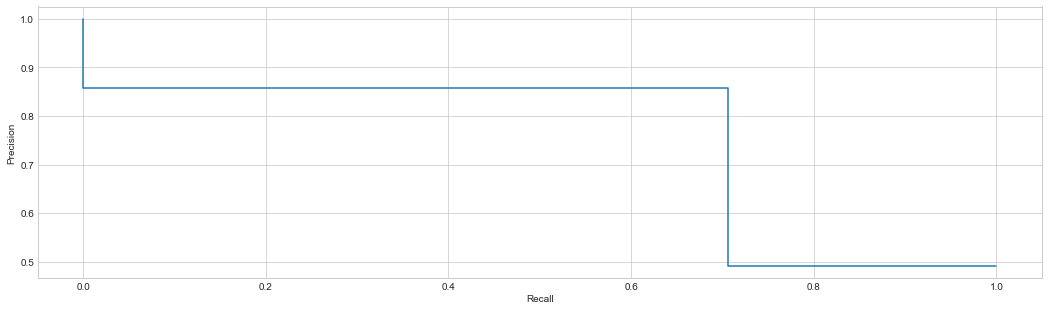

In [104]:
precision, recall, _ = precision_recall_curve(ytest, pred6)
disp5 = PrecisionRecallDisplay(precision=precision, recall=recall)
disp5.plot();

# KNN

In [105]:
from sklearn.metrics import accuracy_score

In [106]:
test_error_rates = []
for k in range(1,20):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(xtrain,ytrain) 
    pred7 = knn_model.predict(xtest)
    test_error = 1 - accuracy_score(ytest,pred7)
    test_error_rates.append(test_error)

Text(0.5, 0, 'K Value')

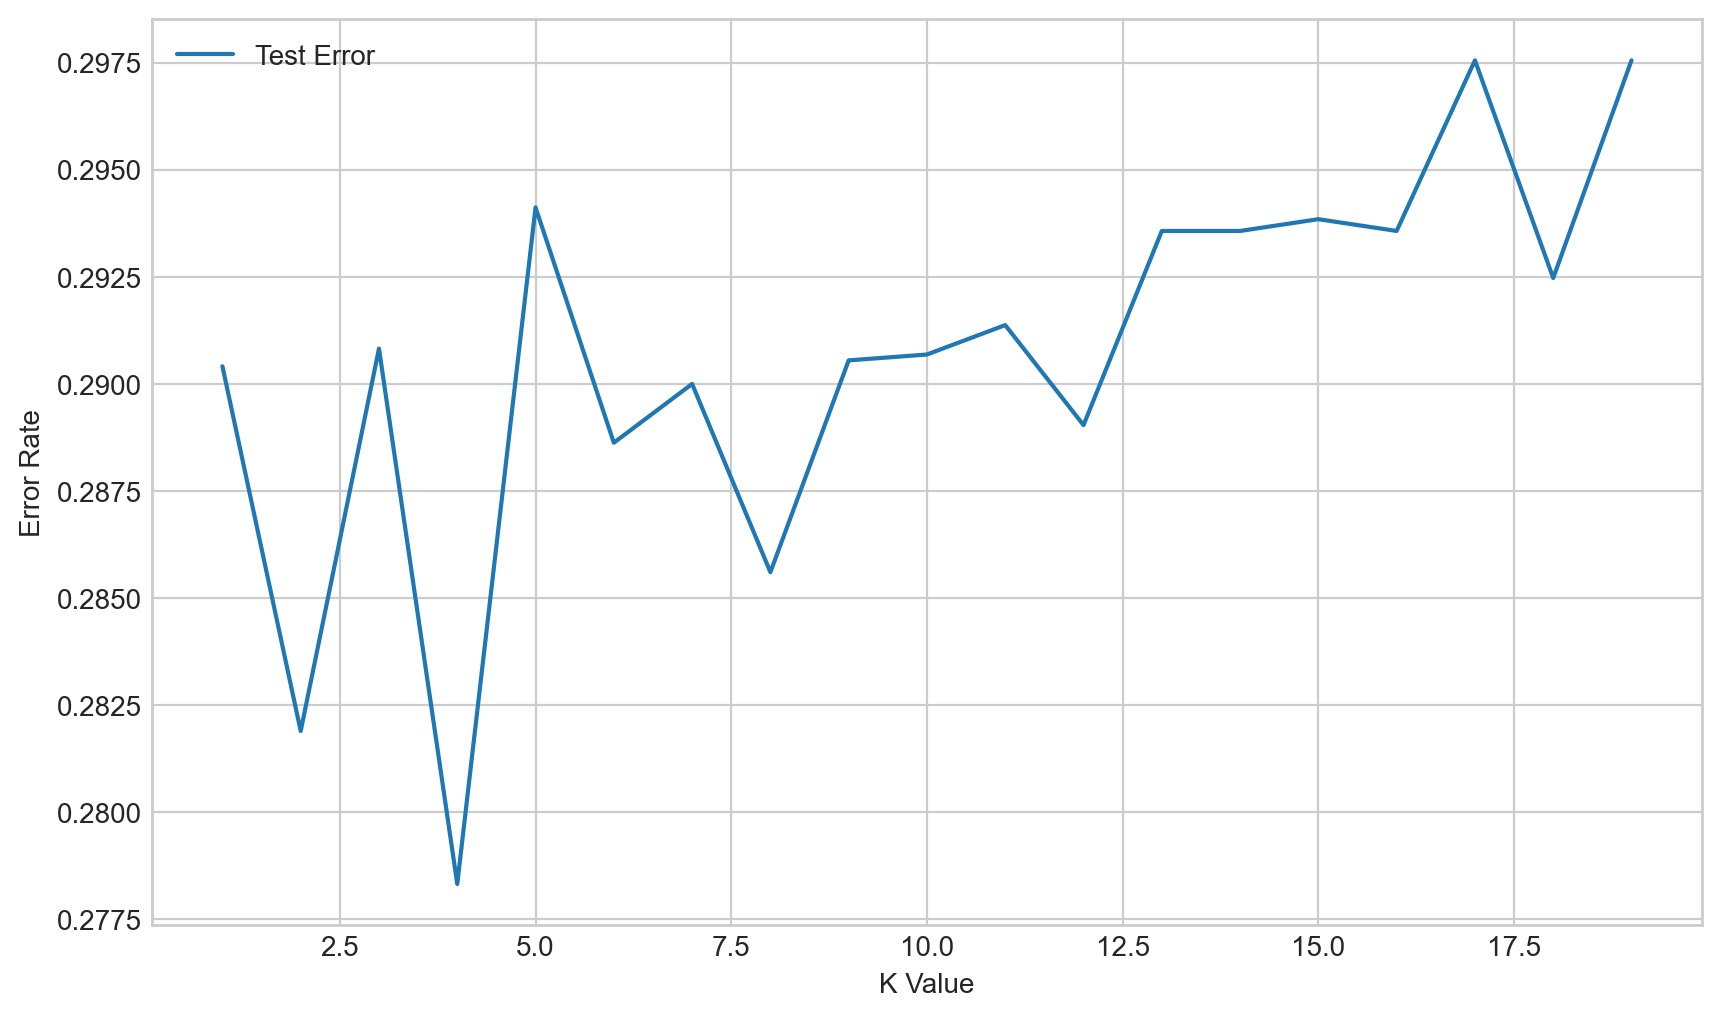

In [107]:
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,20),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")

# K=4 gives the least error rate

In [108]:
knn_model = KNeighborsClassifier(n_neighbors=4)

In [109]:
knn_model.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=4)

In [110]:
pred8 = knn_model.predict(xtest)

              precision    recall  f1-score   support

           0       0.69      0.81      0.75      3700
           1       0.76      0.63      0.69      3576

    accuracy                           0.72      7276
   macro avg       0.73      0.72      0.72      7276
weighted avg       0.73      0.72      0.72      7276



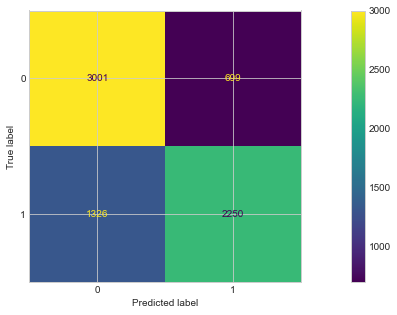

In [111]:
cr = classification_report(ytest,  pred8)
print(cr)

# making a confusion matrix
ConfusionMatrixDisplay.from_predictions(ytest,pred8);

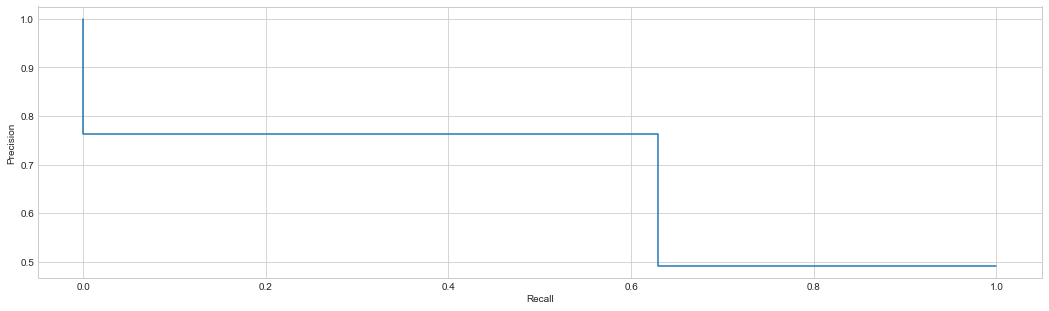

In [112]:
precision, recall, _ = precision_recall_curve(ytest, pred8)
disp6 = PrecisionRecallDisplay(precision=precision, recall=recall)
disp6.plot();

# Logistic Regression

In [113]:
df11 = df.copy()
df11['Disbursed_Amount'] = np.log(df11['Disbursed_Amount'])
df11['Asset_Cost'] = np.log(df11['Asset_Cost'])
df11['ltv'] = np.log(df11['ltv'])
df11['cns_score'] = np.log1p(df11['cns_score'])
df11['Branch_Id'] = le.fit_transform(df11['Branch_Id'])
df11['Employment_Type'] = le.fit_transform(df11['Employment_Type'])
df11['State_Name'] = le.fit_transform(df11['State_Name'])
df11['Region_Name'] = le.fit_transform(df11['Region_Name'])
df11.drop('City_Name',axis=1,inplace=True)

In [114]:
x1 = df11.drop('Loan_Default',axis=1)
y1 = df11['Loan_Default']

In [115]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=10,sampling_strategy='minority')
x1,y1 = sm.fit_resample(x1,y1)
df11 = pd.concat([pd.DataFrame(y1), pd.DataFrame(x1)], axis=1)

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [117]:
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(x1, y1, test_size=0.2, random_state=42)

In [118]:
xtrain1 = stdsc.fit_transform(xtrain1)
xtest1 = stdsc.transform(xtest1)

In [119]:
from sklearn.linear_model import LogisticRegression

In [120]:
log_model = LogisticRegression()
log_model.fit(xtrain1,ytrain1)

LogisticRegression()

In [121]:
pred9 = log_model.predict(xtest1)

In [122]:
print(classification_report(ytest1,pred9))
print("Training Accuracy: ", log_model.score(xtrain1, ytrain1))
print('Testing Accuarcy: ', log_model.score(xtest1, ytest1))

              precision    recall  f1-score   support

           0       0.63      0.66      0.64      3700
           1       0.63      0.59      0.61      3576

    accuracy                           0.63      7276
   macro avg       0.63      0.63      0.63      7276
weighted avg       0.63      0.63      0.63      7276

Training Accuracy:  0.636588550615078
Testing Accuarcy:  0.6264431006047279


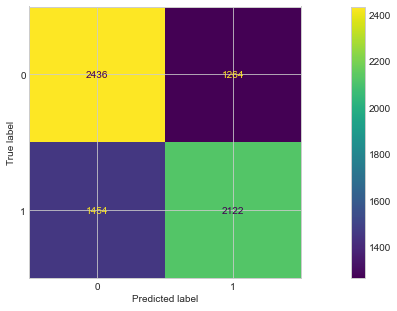

In [123]:
ConfusionMatrixDisplay.from_predictions(ytest1,pred9);

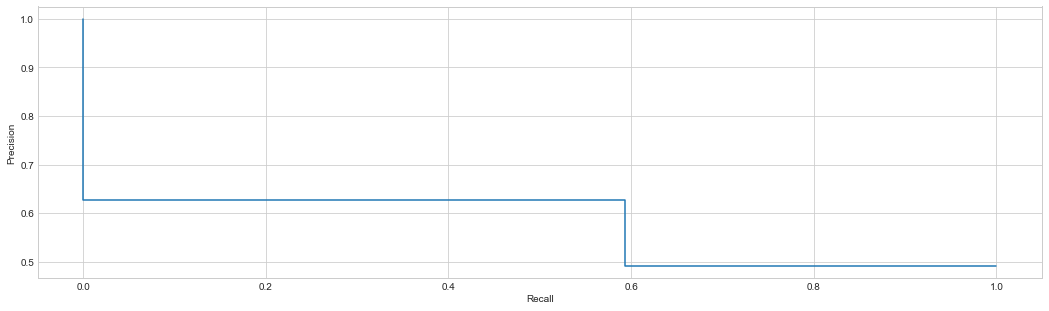

In [124]:
precision, recall, _ = precision_recall_curve(ytest1, pred9)
disp7 = PrecisionRecallDisplay(precision=precision, recall=recall)
disp7.plot();

# Conclusions from model building:-
### 1) In Decision Tree and Random Forest there is a persistent problem of overfitting as seen by the diff b/w train and test accuracy even after applying Bagging classifier 

### 2) The best model performance is given by XGBoost and Gradient Boosting algorithm with Higher Precision and recall value.

<AxesSubplot:ylabel='name'>

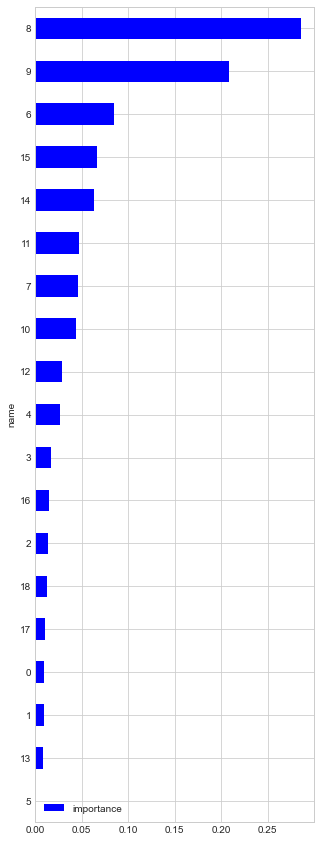

In [125]:
feature = pd.DataFrame()
xtrain1 = pd.DataFrame(xtrain)

feature['name'] = xtrain1.columns
feature['importance'] = model_xgb.feature_importances_

feature.sort_values(by = ['importance'], ascending = True, inplace = True)
feature.set_index('name', inplace = True)

feature.plot(kind = 'barh', color = 'blue', figsize = (5, 15), fontsize = 10)

In [126]:
final_pred = model_xgb.predict(x)

In [127]:
submission = pd.DataFrame({'loan_default': final_pred},index=df10.index.values)

In [128]:
submission.head()

,loan_default
0,1
1,0
2,1
3,1
4,0
